In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [49]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Data exploration
First we will look for the missing values and try to find some relation to impute the missinga values

In [51]:
print(train_data.info())
missing_percentage = train_data.isna().mean() * 100
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare          

We can see than on the training data we have some features with some missing values, the cabin so this column don't will be very useful, we can should look for a way to predict the age of a passenger, and we have a really low Embarked missing so we can delete thats rows

In [52]:
print(test_data.info())
missing_percentage = test_data.isna().mean() * 100
print(missing_percentage)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype:

Here we have the same a high missing value count on cabin, we must look for a way to complete the age and the fare of the people.

In [53]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## Looking for insights

In [55]:
for column in train_data.columns:
    if(column not in ['PassengerId', 'Name', 'Ticket', 'Cabin']):
        unique_values = train_data[column].unique()
        print(f"Unique values in '{column}': {unique_values}")

Unique values in 'Survived': [0 1]
Unique values in 'Pclass': [3 1 2]
Unique values in 'Sex': ['male' 'female']
Unique values in 'Age': [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
Unique values in 'SibSp': [1 0 3 4 2 5 8]
Unique values in 'Parch': [0 1 2 5 3 4 6]
Unique values in 'Fare': [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7

In [56]:
(train_data[['Pclass', 'Survived']]
 .groupby(['Pclass'], as_index=False)
 .mean()
 .sort_values(by='Survived', ascending=False)
)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [57]:
(train_data[['Sex', 'Survived']]
 .groupby(['Sex'], as_index=False)
 .mean()
 .sort_values(by='Survived', ascending=False)
)

,Sex,Survived
0,female,0.742038
1,male,0.188908


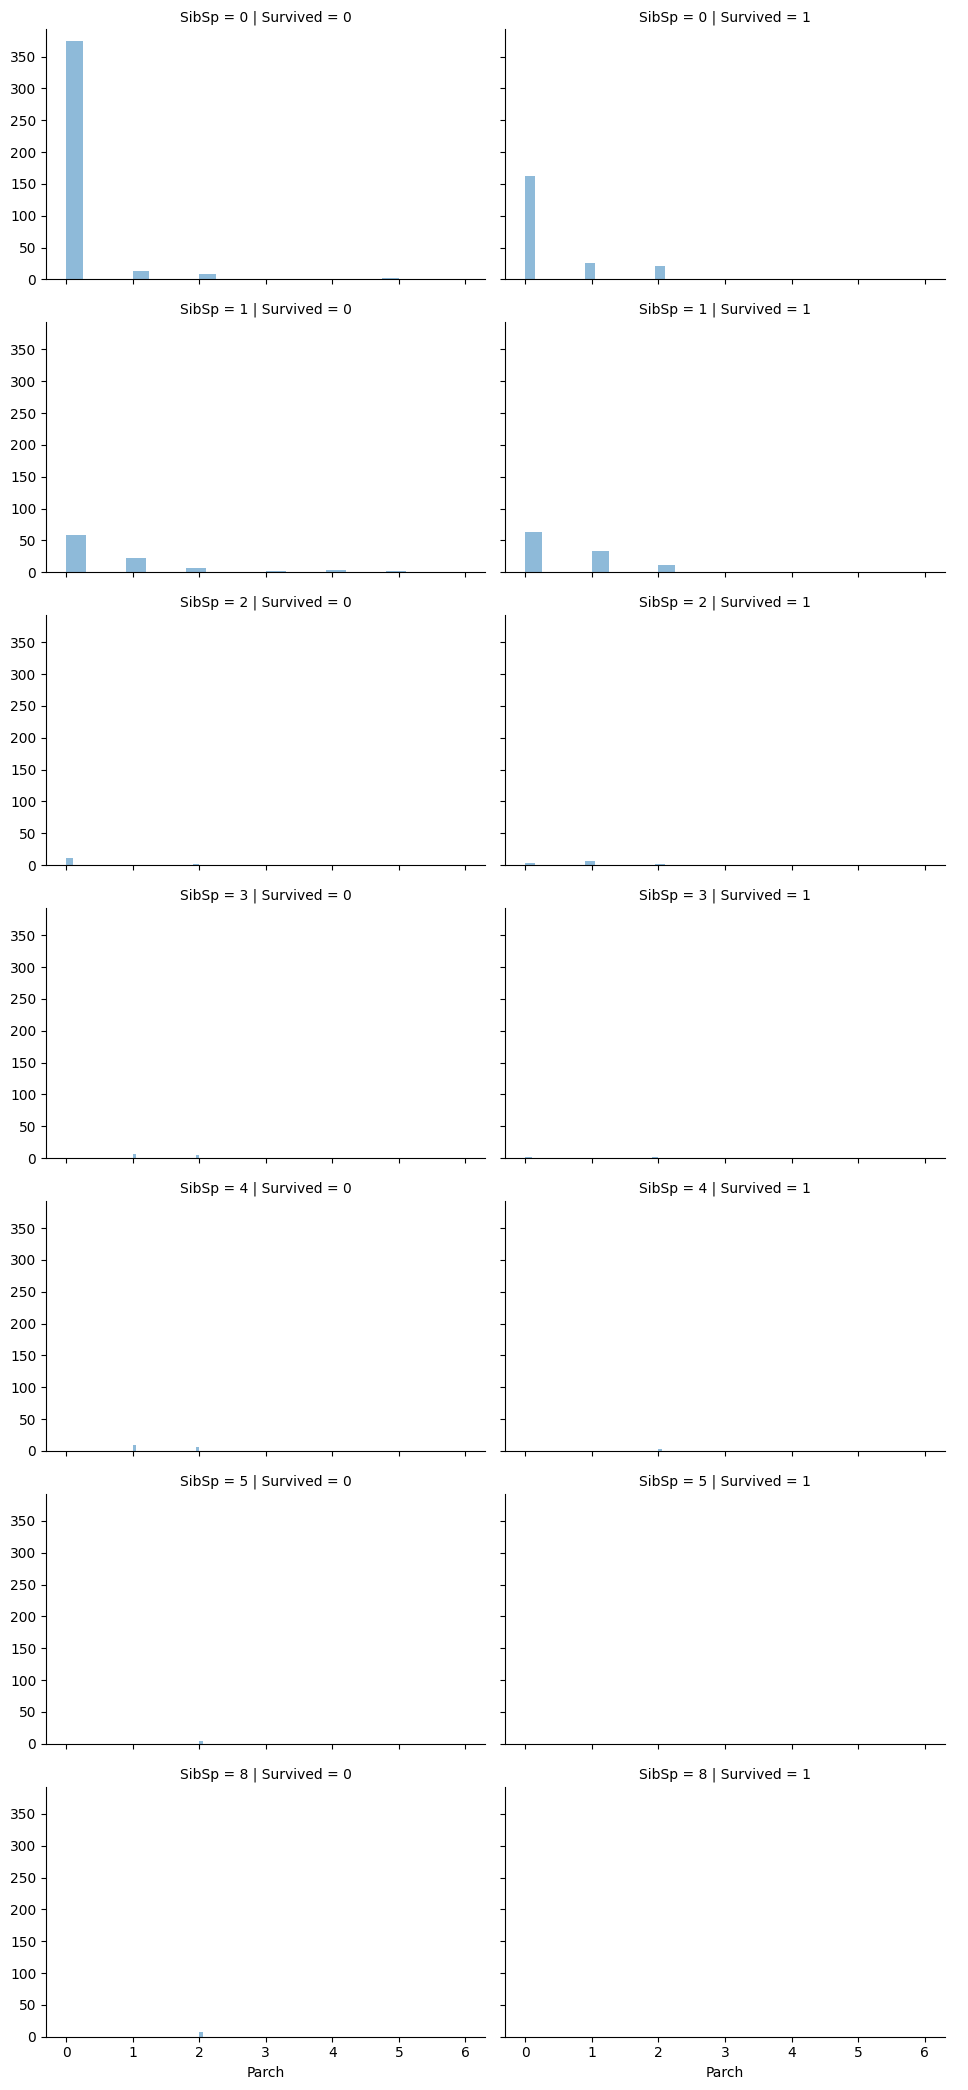

In [58]:
grid = sns.FacetGrid(train_data, col='Survived', row='SibSp', aspect=1.6)
grid.map(plt.hist, 'Parch', alpha=.5, bins=20)
grid.add_legend();

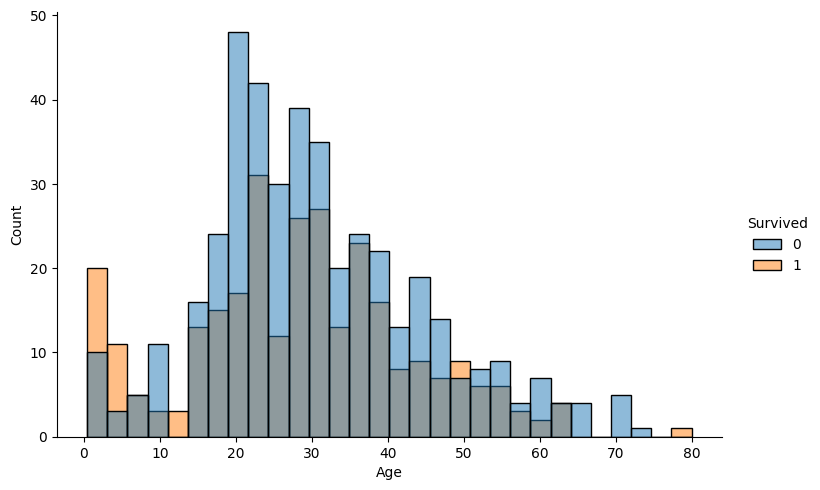

In [59]:
sns.displot(train_data, x='Age', hue='Survived', bins=30, aspect=1.5)

In [60]:
(
    train_data[train_data["Survived"] == 1].isna().mean() * 100
)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            15.204678
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          60.233918
Embarked        0.584795
dtype: float64

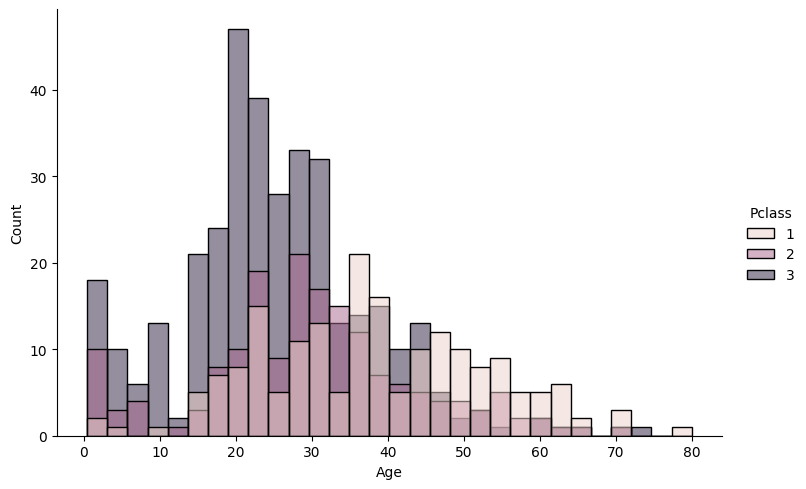

In [61]:
sns.displot(train_data, x='Age', hue='Pclass', bins=30, aspect=1.5)

In [62]:
# Extracting the 'Title' from the 'Name'
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Impute missing 'Age' values based on the median age of groups (Pclass, Sex, Title)
train_data['Age'] = train_data.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [63]:
(
    train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [64]:
# Calculate the median fare for each class
median_fares = train_data.groupby('Pclass')['Fare'].median()

# Fill missing fare values based on their Pclass
for pclass in median_fares.index:
    train_data.loc[(train_data['Fare'].isnull()) & (train_data['Pclass'] == pclass), 'Fare'] = median_fares[pclass]


In [65]:
missing_percentage = test_data.isna().mean() * 100
print(missing_percentage)

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64


In [66]:
# Calculate the median fare for each class
median_fares = test_data.groupby('Pclass')['Fare'].median()

# Fill missing fare values based on their Pclass
for pclass in median_fares.index:
    test_data.loc[(test_data['Fare'].isnull()) & (test_data['Pclass'] == pclass), 'Fare'] = median_fares[pclass]


In [67]:
# Extracting the 'Title' from the 'Name'
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Impute missing 'Age' values based on the median age of groups (Pclass, Sex, Title)
test_data['Age'] = test_data.groupby(['Pclass', 'Sex', 'Title'])['Age'].transform(lambda x: x.fillna(x.median()))

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

/opt/conda/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [68]:
train_data["Embarked"].unique()
1-(len(train_data["Embarked"].dropna()))/(len(train_data["Embarked"]))
#There are few missing values so will delete.
train_data = train_data.dropna(subset = ["Embarked"])
train_data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

# Look for new Features.

In [69]:
train_data_imp =  train_data.drop(["Name","Ticket","PassengerId","Cabin", "Title"], axis=1)
train_data_imp = pd.get_dummies(train_data_imp, dtype=float)
train_data_imp.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [70]:
combine = [train_data_imp, test_data]

In [71]:
train_data_imp['AgeBand'] = pd.cut(train_data_imp['Age'], 5)
train_data_imp[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.548077
1,"(16.336, 32.252]",0.336735
2,"(32.252, 48.168]",0.407407
3,"(48.168, 64.084]",0.426471
4,"(64.084, 80.0]",0.090909


In [72]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data_imp.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeBand
0,0,3,1.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0,"(16.336, 32.252]"
1,1,1,2.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0,"(32.252, 48.168]"
2,1,3,1.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,"(16.336, 32.252]"
3,1,1,2.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,"(32.252, 48.168]"
4,0,3,2.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0,"(32.252, 48.168]"


In [73]:
train_data_imp = train_data_imp.drop(['AgeBand'], axis=1)
combine = [train_data_imp, test_data]

In [74]:
train_data_imp['FareBand'] = pd.cut(train_data_imp['Fare'], 4)
train_data_imp[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 128.082]",0.366627
1,"(128.082, 256.165]",0.724138
2,"(256.165, 384.247]",0.666667
3,"(384.247, 512.329]",1.000000


In [75]:

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 128, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128) & (dataset['Fare'] <= 256), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256) & (dataset['Fare'] <= 384), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 384, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_data_imp = train_data_imp.drop(['FareBand'], axis=1)
combine = [train_data_imp, test_data]
    


In [76]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_data_imp[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.300935
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [77]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_data_imp[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.300935


In [78]:
train_data_imp = train_data_imp.drop(["SibSp","Parch", "FamilySize"],axis = 1)

In [97]:
combine = [train_data_imp, test_data]
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

In [80]:
train_data_imp.head(10)

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Age*Class
0,0,3,1.0,0,0.0,1.0,0.0,0.0,1.0,0,3.0
1,1,1,2.0,0,1.0,0.0,1.0,0.0,0.0,0,2.0
2,1,3,1.0,0,1.0,0.0,0.0,0.0,1.0,1,3.0
3,1,1,2.0,0,1.0,0.0,0.0,0.0,1.0,0,2.0
4,0,3,2.0,0,0.0,1.0,0.0,0.0,1.0,1,6.0
5,0,3,1.0,0,0.0,1.0,0.0,1.0,0.0,1,3.0
6,0,1,3.0,0,0.0,1.0,0.0,0.0,1.0,1,3.0
7,0,3,0.0,0,0.0,1.0,0.0,0.0,1.0,0,0.0
8,1,3,1.0,0,1.0,0.0,0.0,0.0,1.0,0,3.0
9,1,2,0.0,0,1.0,0.0,1.0,0.0,0.0,0,0.0


In [98]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,892,3,"Kelly, Mr. James",male,2.0,0,0,330911,0,NaN,Q,Mr,1,1,6.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2.0,1,0,363272,0,NaN,S,Mrs,2,0,6.0
2,894,2,"Myles, Mr. Thomas Francis",male,3.0,0,0,240276,0,NaN,Q,Mr,1,1,6.0
3,895,3,"Wirz, Mr. Albert",male,1.0,0,0,315154,0,NaN,S,Mr,1,1,3.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1.0,1,1,3101298,0,NaN,S,Mrs,3,0,3.0


# Train Model

In [82]:
X = train_data_imp.drop("Survived", axis = 1)
y = train_data_imp["Survived"]

In [83]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [84]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=1/4, random_state=42)

In [116]:
params = {'colsample_bytree': 0.7, 'gamma': 0.2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'reg_alpha': 0.01, 'reg_lambda': 1, 'subsample': 0.8}
num_rounds = 200  # Number of boosting rounds


In [117]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

In [118]:
bst = xgb.train(params, dtrain, num_rounds)

In [119]:
predictionstrain = bst.predict(dtrain)
predictions = bst.predict(dval)
# Convert probabilities to binary output (0 or 1)
predictionstrain = [1 if value > 0.5 else 0 for value in predictionstrain]
predictions = [1 if value > 0.5 else 0 for value in predictions]
accuracy_train = accuracy_score(y_train, predictionstrain)
accuracy = accuracy_score(y_val, predictions)
print(f"Accuracy train: {accuracy_train * 100:.2f}%")
print(f"Accuracy validation: {accuracy * 100:.2f}%")

Accuracy train: 83.48%
Accuracy validation: 82.51%


     train-logloss-mean  train-logloss-std  test-logloss-mean  \
0              0.647805           0.004618           0.651283   
1              0.626920           0.005130           0.631888   
2              0.609364           0.005564           0.615585   
3              0.592614           0.005804           0.600383   
4              0.578326           0.005689           0.586954   
..                  ...                ...                ...   
195            0.388656           0.007549           0.440293   
196            0.388660           0.007554           0.440249   
197            0.388649           0.007555           0.440348   
198            0.388631           0.007537           0.440476   
199            0.388612           0.007543           0.440501   

     test-logloss-std  
0            0.014686  
1            0.014517  
2            0.014437  
3            0.015035  
4            0.015585  
..                ...  
195          0.029612  
196          0.029680  
197

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

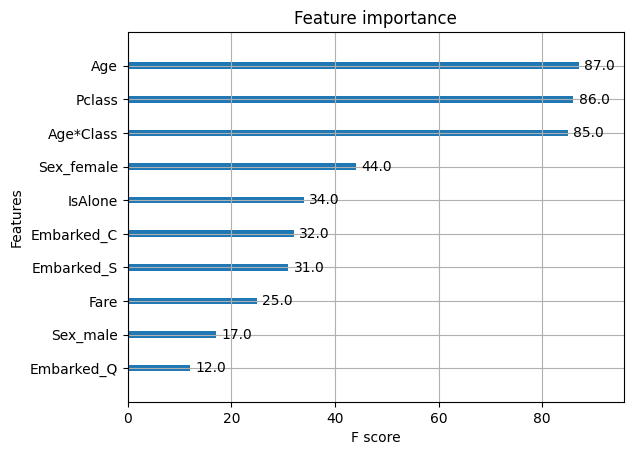

In [120]:
# Cross-validation
cv_results = xgb.cv(params, dtrain, num_boost_round=num_rounds, nfold=5, metrics='logloss', as_pandas=True)
print(cv_results)

# Feature importance
xgb.plot_importance(bst)

<Axes: >

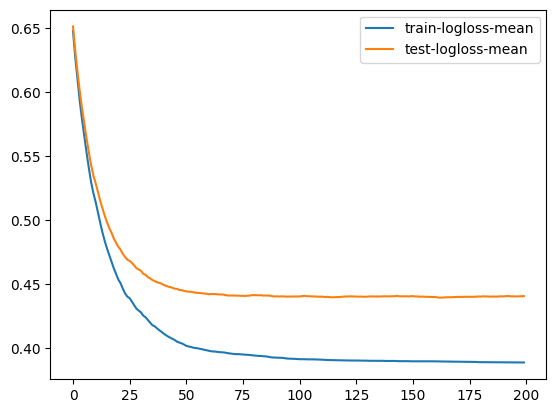

In [121]:
cv_results[['train-logloss-mean', 'test-logloss-mean']].plot()

In [122]:
dtrain = xgb.DMatrix(X, label=y)
bst = xgb.train(params, dtrain, num_rounds)

In [123]:
predictionstrain = bst.predict(dtrain)
predictionstrain = [1 if value > 0.5 else 0 for value in predictionstrain]
accuracy_train = accuracy_score(y, predictionstrain)
print(f"Accuracy train: {accuracy_train * 100:.2f}%")

Accuracy train: 83.69%


In [166]:
predictionstrain = np.array(predictionstrain)
tp = ((predictionstrain == 1) & (y == 1)).sum()
tn = ((predictionstrain == 0) & (y == 0)).sum()
fp = ((predictionstrain == 1) & (y == 0)).sum()
fn = ((predictionstrain == 0) & (y == 1)).sum()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.8823529411764706
Recall: 0.6617647058823529


# Look for the best hyperparameters

In [124]:
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV


# # Define the parameter grid
# param_grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],  # controls the step size at each iteration while moving toward a minimum of a loss function
#     'n_estimators': [50, 100, 200],  # number of trees you want to build
#     'max_depth': [3, 4, 5, 6],  # maximum depth of the trees
#     'min_child_weight': [1, 2, 3],  # minimum sum of weights of all observations required in a child
#     'gamma': [0, 0.1, 0.2, 0.3],  # minimum loss reduction required to make a further partition on a leaf node of the tree
#     'subsample': [0.6, 0.7, 0.8, 1.0],  # ratio of the training instances
#     'colsample_bytree': [0.6, 0.7, 0.8, 1.0],  # ratio of columns when constructing each tree
#     'reg_alpha': [0, 0.01, 0.1],  # L1 regularization term on weights
#     'reg_lambda': [1, 1.5, 2]  # L2 regularization term on weights
# }



# # Initialize the XGBoost Classifier
# xgb_clf = xgb.XGBClassifier()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=0)

# # Fit the GridSearchCV
# grid_search.fit(X, y)

# # Best parameters and best score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

In [125]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(X)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

84.03

# Eval the model

In [126]:
test_data_prep = test_data.drop(["PassengerId","Ticket","Cabin", "Name", "Title", "SibSp","Parch", "FamilySize"], axis=1)
test_data_prep = pd.get_dummies(test_data_prep, dtype=float)
isalone = test_data_prep[["IsAlone", "Age*Class"]]
test_data_prep = test_data_prep.drop(["IsAlone", "Age*Class"], axis = 1)
test_data_prep[["IsAlone", "Age*Class"]] = isalone
test_data_prep.head()

,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,IsAlone,Age*Class
0,3,2.0,0,0.0,1.0,0.0,1.0,0.0,1,6.0
1,3,2.0,0,1.0,0.0,0.0,0.0,1.0,0,6.0
2,2,3.0,0,0.0,1.0,0.0,1.0,0.0,1,6.0
3,3,1.0,0,0.0,1.0,0.0,0.0,1.0,1,3.0
4,3,1.0,0,1.0,0.0,0.0,0.0,1.0,0,3.0


In [127]:
dtest = xgb.DMatrix(test_data_prep)
predictions = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in predictions]
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [128]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
